<a href="http://landlab.github.io"><img style="float: left" src="https://raw.githubusercontent.com/landlab/tutorials/master/landlab_header.png"></a>


# Using the Landlab flexure component

<hr>
<small> For instructions on how to run an interactive iPython notebook, click here: <a href="https://github.com/landlab/tutorials/blob/master/README.md">https://github.com/landlab/tutorials/blob/master/README.md</a></small><br>
<small>For more Landlab tutorials, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<hr>

In this example we will:
* create a Landlab component that solves the flexure equation
* apply a point loads all over the place
* run the component
* plot some output

A bit of magic so that we can plot within this notebook.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Create the component

We are going to build a uniform rectilinear grid with a node spacing of 10 km in each direction on which we will solve the flexure equation.

In [2]:
(n_rows, n_cols) = (200, 400)
(dy, dx) = (10e3, 10e3)

In [3]:
from landlab import RasterModelGrid
grid = RasterModelGrid((n_rows, n_cols), dx)

/Users/jennyknuth/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Now we create the flexure component and tell it to use our newly-created grid.

In [4]:
from landlab.components.flexure import FlexureComponent
flex = FlexureComponent(grid, method='flexure')

## Add some loading
We will add some loading at the center of the grid. For this component, the name of the variable that hold the applied loads is call, `lithosphere__overlying_pressure`. We add loads of random magnitude at every node of the grid.

In [5]:
loads = np.random.normal(1e9, 1e12, grid.number_of_nodes)
grid.at_node['lithosphere__overlying_pressure'][:] = loads

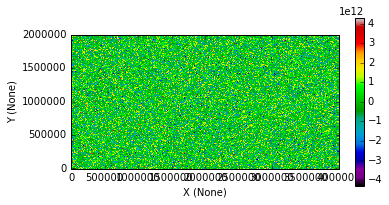

In [6]:
grid.imshow('node', 'lithosphere__overlying_pressure', symmetric_cbar=True,
            cmap='spectral', show=True, shrink=.75)

## Update the component to solve for deflection
If you have more than one processor on your machine you may want to use several of them.

In [7]:
flex.update(n_procs=4)

# Plot the output
The name of the variable that holds elevations is called `lithosphere__elevation`.

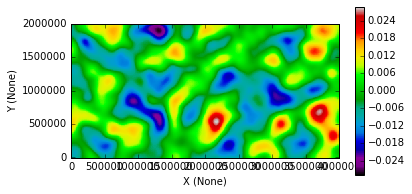

In [8]:
grid.imshow('node', 'lithosphere__elevation', symmetric_cbar=True,
            cmap='spectral', show=True, shrink=.75)